In [1]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
import splitfolders
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

train_path = 'H:/Shortcuts/Research paper/flowerNET/flower/train'
valid_path = 'H:/Shortcuts/Research paper/flowerNET/flower/val'
test_path = 'H:/Shortcuts/Research paper/flowerNET/flower/test'

# useful for getting number of classes
folders = glob('H:/Shortcuts/Research paper/flowerNET/flower/train/*')
len(folders)

3

In [3]:
# add preprocessing layer to the front of VGG

ResNet50 = ResNet50(weights="imagenet", include_top=False, input_shape=IMAGE_SIZE + [3])

# don't train existing weights
for layer in ResNet50.layers:
    layer.trainable = False


# our layers - you can add more if you want
x = Flatten()(ResNet50.output)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=ResNet50.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [4]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0,
                                   vertical_flip=False,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3037 images belonging to 3 classes.
Found 867 images belonging to 3 classes.


In [6]:
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)


Epoch 1/35
95/95 [==============================] - 875s 9s/step - loss: 6.2300 - accuracy: 0.4122 - val_loss: 0.9123 - val_accuracy: 0.5213
Epoch 2/35
95/95 [==============================] - 1386s 15s/step - loss: 1.2481 - accuracy: 0.4942 - val_loss: 0.7397 - val_accuracy: 0.6897
Epoch 3/35
95/95 [==============================] - 912s 10s/step - loss: 1.0916 - accuracy: 0.5403 - val_loss: 0.7010 - val_accuracy: 0.7116
Epoch 4/35
95/95 [==============================] - 962s 10s/step - loss: 1.0290 - accuracy: 0.5456 - val_loss: 0.7373 - val_accuracy: 0.6586
Epoch 5/35
95/95 [==============================] - 829s 9s/step - loss: 0.8876 - accuracy: 0.5861 - val_loss: 0.7146 - val_accuracy: 0.6967
Epoch 6/35
95/95 [==============================] - 807s 8s/step - loss: 0.8469 - accuracy: 0.5957 - val_loss: 0.7671 - val_accuracy: 0.5975
Epoch 7/35
95/95 [==============================] - 643s 7s/step - loss: 0.8221 - accuracy: 0.6115 - val_loss: 0.6872 - val_accuracy: 0.7013
Epoch 8/3

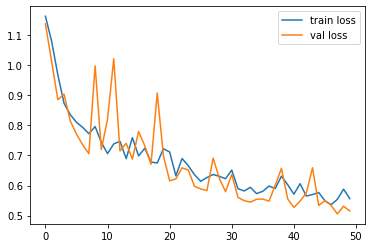

In [7]:
# loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/LossVal_loss_ResNet50.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/LossVal_loss_ResNet50')
plt.show()

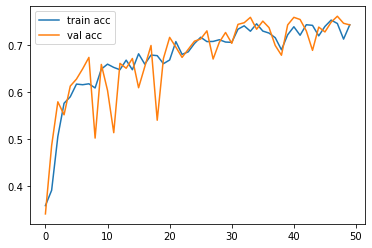

In [8]:
#plotting val acc and training acc

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/accuracy_ResNet50.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/accuracy_ResNet50')
plt.show()

In [9]:
model.save('H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/ResNet50.h5')

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [7]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
val_loss, val_acc = model.evaluate(val_set, steps=16)
print("Traning Loss and traing accurcy: ",train_loss, train_acc )
print("Validation Loss and Validation accurcy: ",val_loss, val_acc )

16/16 [==============================] - 65s 4s/step - loss: 0.5771 - accuracy: 0.7578
Traning Loss and traing accurcy:  0.5202562212944031 0.783203125
Validation Loss and Validation accurcy:  0.5771070718765259 0.7578125


In [44]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=False,
    image_size=(224,224),
    batch_size=BATCH_SIZE
)

Found 438 files belonging to 3 classes.


In [45]:
class_names = testing_set.class_names
class_names

['Black Spot', 'Downy mildew', 'Fresh Leaf']

In [46]:
# Extracting all test image and corrosponding labels from tesing image
test_label=[]
test_img=[]
for img, label in testing_set:
  #print(label.numpy())
  test_label.append(label.numpy())
  test_img.append(img.numpy())
print("Total batch of test label: ",len(test_label))
print("Total batch of test image: ",len(test_img))

###############################################################################################

# Extracting only all test image  from tesing image batch list
actual_img=[]
for i in range(len(test_img)):
  for i in test_img[i]:
    i = i*(1/255) # we have to rescale the test image as well to feed the model
    actual_img.append(i)

print("Total Number of image: ", len(actual_img))


# Extracting only all test image  labels from tesing image batch list
actual_label=[]
for i in range(len(test_label)):
  for i in test_label[i]:
    actual_label.append(class_names[i])
     
    

print("Total number of image label : ",len(actual_label))

Total batch of test label:  14
Total batch of test image:  14
Total Number of image:  438
Total number of image label :  438


Black Spot


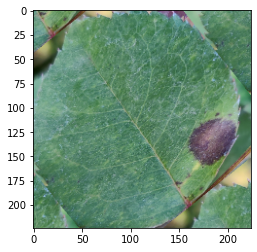

In [47]:
print(actual_label[27])
plt.imshow(actual_img[27])

In [ ]:
# make prediction using loaded model
predicted_label=[]
for img in actual_img:
  img_array = tf.expand_dims(img, 0)
  predictions = model.predict(img_array)
  label= class_names[np.argmax(predictions)]
  
  predicted_label.append(label)
 
  

len(predicted_label)

In [36]:
# Printing all evaluation matrix
print("Test accuracy: ",accuracy_score(actual_label, predicted_label))
print(classification_report(actual_label, predicted_label))

Test accuracy:  0.682648401826484
              precision    recall  f1-score   support

  Black Spot       0.57      0.82      0.67       145
Downy mildew       0.75      0.97      0.84       149
  Fresh Leaf       1.00      0.25      0.40       144

    accuracy                           0.68       438
   macro avg       0.77      0.68      0.64       438
weighted avg       0.77      0.68      0.64       438



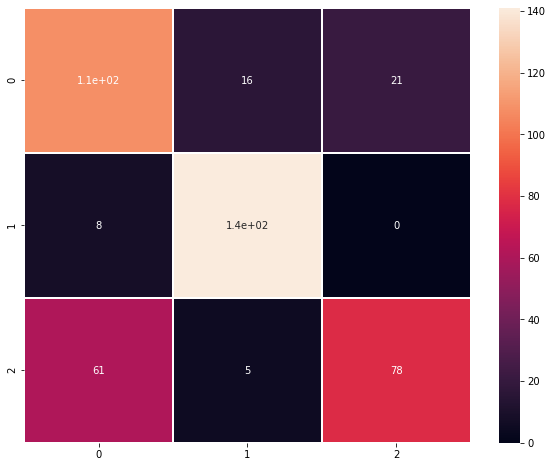

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_label, predicted_label)
import seaborn as sns
ax= plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, linewidth=.5)
plt.plot()
plt.savefig("H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/confussion_matrix_ResNet50.svg")
plt.savefig("H:/Shortcuts/Research paper/flowerNET/Augmented/ResNet50/confussion_matrix_ResNet50")
plt.show()